In [13]:
import numpy as np

# Read the new files
AFS_growth_test_filled = np.loadtxt('AFS_test_filled.txt')
AFS_growth_train_filled = np.loadtxt('AFS_train_filled.txt')
theta_test = np.loadtxt('theta_test.txt')
theta_train = np.loadtxt('theta_train.txt')

# Display the data
print("AFS Growth Test Filled Data:")
print(AFS_growth_test_filled)
print("\nAFS Growth Train Filled Data:")
print(AFS_growth_train_filled)
print("\nGrowth Test Data (Theta):")
print(theta_test)
print("\nGrowth Train Data (Theta):")
print(theta_train)

AFS Growth Test Filled Data:
[[ 9.  1.  2. ...  0.  0.  0.]
 [12.  3.  0. ...  0.  0.  0.]
 [ 8.  6.  1. ...  0.  0.  0.]
 ...
 [ 2.  3.  1. ...  0.  0.  0.]
 [ 7.  1.  0. ...  0.  0.  0.]
 [39.  5.  5. ...  0.  0.  0.]]

AFS Growth Train Filled Data:
[[15.  2.  2. ...  0.  0.  0.]
 [10.  3.  1. ...  0.  0.  0.]
 [12.  4.  6. ...  0.  0.  0.]
 ...
 [ 7.  5.  4. ...  0.  0.  0.]
 [ 7.  5.  2. ...  0.  0.  0.]
 [ 9.  3.  3. ...  0.  0.  0.]]

Growth Test Data (Theta):
[19.305002 20.327783 25.935548  8.07144  31.667031 23.162875 10.768527
 39.607714 36.614535 40.607725 16.118907 29.183343  4.656394 39.478599
 23.330393 49.517545 39.868063 18.950541 23.858286 35.235718 47.717597
  8.032549 43.454268 43.010344 33.165182  4.071387 11.117481 10.697351
 21.335005 42.901064 27.311978  8.730248 36.041253 24.07691  40.089229
  9.651104 14.688285 49.975982 18.332141 40.113578 48.148124 10.40257
 33.614209 26.251992 10.299215  8.331093 25.890452 31.597501 24.625862
  6.676867  9.54883  14.062746 48

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
AFS_growth_train = np.loadtxt('AFS_train_filled.txt')
theta_train = np.loadtxt('theta_train.txt')
AFS_growth_test = np.loadtxt('AFS_test_filled.txt')
theta_test = np.loadtxt('theta_test.txt')

# Create and train the linear model
linear_model = LinearRegression()
linear_model.fit(AFS_growth_train, theta_train)

# Predict the theta values for the test set
theta_test_pred = linear_model.predict(AFS_growth_test)

# Calculate the normalized Mean Squared Error (MSE) on the test set
mse_weighted = np.mean(((theta_test - theta_test_pred)**2) / (theta_test**2))

# Calculate the Mean Squared Error (MSE) on the test set without weighting
mse = mean_squared_error(theta_test, theta_test_pred)

# Print the MSE
print(f"Mean Squared Error on theta_test: {mse}")
# Print the weighted MSE
print(f"Weighted Mean Squared Error on theta_test: {mse_weighted}")

Mean Squared Error on theta_test: 55.75731554672452
Weighted Mean Squared Error on theta_test: 15.257101559500454


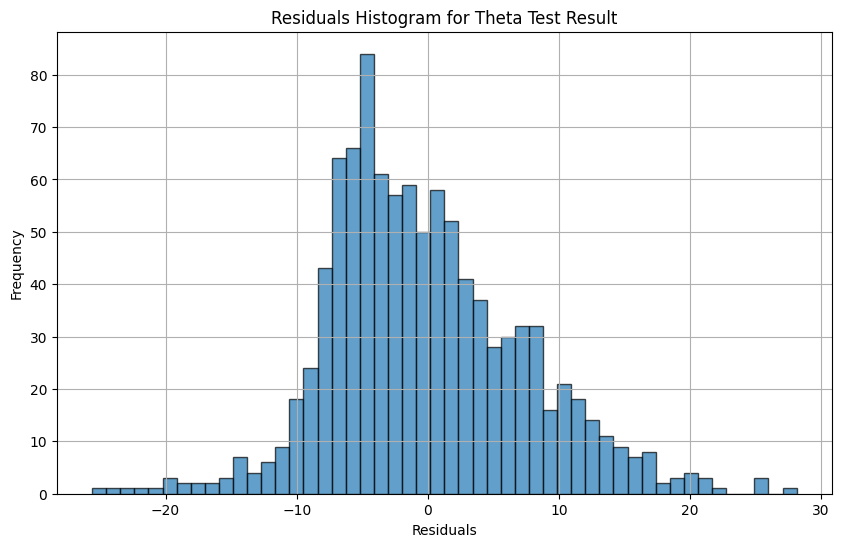

In [17]:
# Calculate the residuals for the growth result
import matplotlib.pyplot as plt
residuals_theta_test = theta_test - theta_test_pred

# Plot the histogram of residuals for the growth result
plt.figure(figsize=(10, 6))
plt.hist(residuals_theta_test, bins=50, edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram for Theta Test Result')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


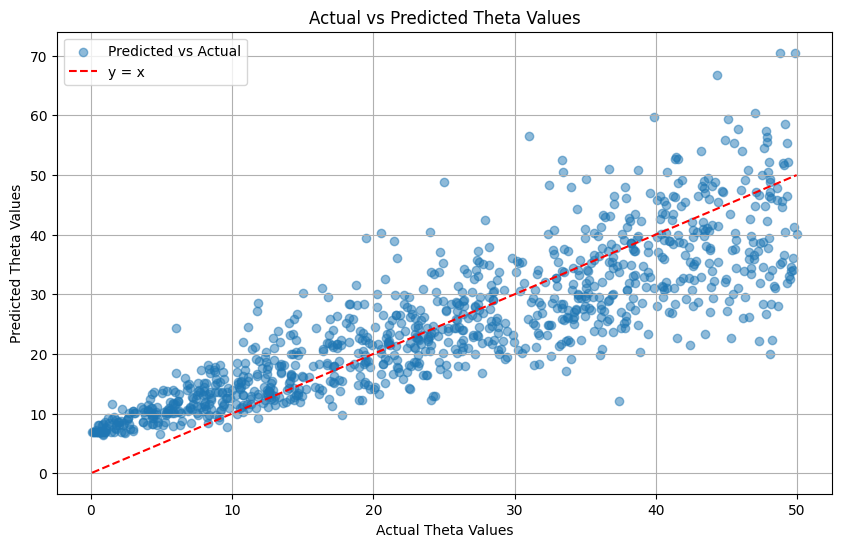

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(theta_test, theta_test_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(theta_test), max(theta_test)], [min(theta_test), max(theta_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Theta Values')
plt.xlabel('Actual Theta Values')
plt.ylabel('Predicted Theta Values')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Load the data
AFS_growth_train_filled = np.loadtxt('AFS_train_filled.txt')
growth_train = np.loadtxt('theta_train.txt')
AFS_growth_test_filled = np.loadtxt('AFS_test_filled.txt')
growth_test = np.loadtxt('theta_test.txt')
# No log transformation applied

# Normalize the data
scaler = StandardScaler()
AFS_growth_train_filled = scaler.fit_transform(AFS_growth_train_filled)
AFS_growth_test_filled = scaler.transform(AFS_growth_test_filled)

# Use the entire training data for training
X_train, y_train = AFS_growth_train_filled, growth_train

# Build the CNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(AFS_growth_train_filled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(AFS_growth_test_filled, growth_test)
print(f"Test MAE: {test_mae}")

# Predict the growth_test values (theta)
growth_test_pred_cnn = model.predict(AFS_growth_test_filled)

# Print the predicted growth_test values (theta)
print("Predicted Growth Test Values (Theta):", growth_test_pred_cnn.flatten())


Epoch 1/50


C:\Users\xuech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 236.6258 - mae: 11.0873
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 56.4635 - mae: 5.6977
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 48.5284 - mae: 5.3302
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 44.7731 - mae: 5.1515
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 42.3982 - mae: 5.0095
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40.5430 - mae: 4.9161
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.9836 - mae: 4.8053
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.2481 - mae: 4.7735
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 37.6959 - mae: 4.7325
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35.8148 - mae: 4.6061
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35.5787 - mae: 4.6037
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35.2590 - mae: 4.5941
Epoch 13/50
625/625 ━━

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse_cnn = mean_squared_error(growth_test, growth_test_pred_cnn)

# Calculate the Mean Absolute Error
mae_cnn = np.mean(np.abs(growth_test - growth_test_pred_cnn))

# Calculate the R² Score
r2_score_cnn = r2_score(growth_test, growth_test_pred_cnn)

# Calculate the correlation coefficient
correlation_cnn = np.corrcoef(growth_test.flatten(), growth_test_pred_cnn.flatten())[0, 1]

# Print the values
print("Mean Squared Error:", mse_cnn)
print("Mean Absolute Error:", mae_cnn)
print("R² Score:", r2_score_cnn)
print("Correlation Coefficient:", correlation_cnn)

# Calculate the normalized Mean Squared Error (MSE) on the test set
normalized_mse_cnn = np.mean(((growth_test - growth_test_pred_cnn)**2) / (growth_test**2))
#print(f"First 10 normalized MSE values: {((growth_test[:10] - growth_test_pred_cnn[:10])**2) / (growth_test[:10]**2)}")

# Print the normalized MSE
print(f"Normalized Mean Squared Error on growth_test: {normalized_mse_cnn}")


Mean Squared Error: 63.00451888037372
Mean Absolute Error: 16.33180184950825
R² Score: 0.6935998160910292
Correlation Coefficient: 0.8436520253636978
Normalized Mean Squared Error on growth_test: 257.96054559043586


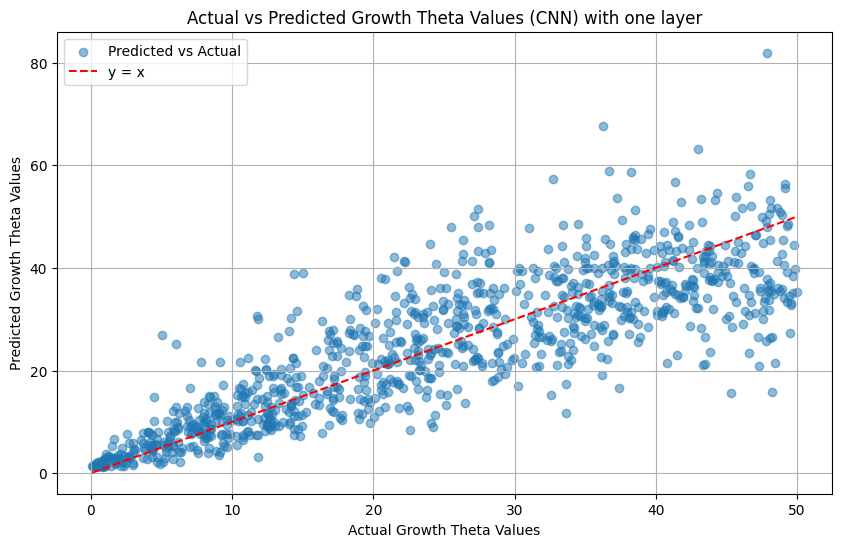

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(growth_test, growth_test_pred_cnn, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(growth_test), max(growth_test)], [min(growth_test), max(growth_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Growth Theta Values (CNN) with one layer')
plt.xlabel('Actual Growth Theta Values')
plt.ylabel('Predicted Growth Theta Values')
plt.legend()
plt.grid(True)
plt.show()

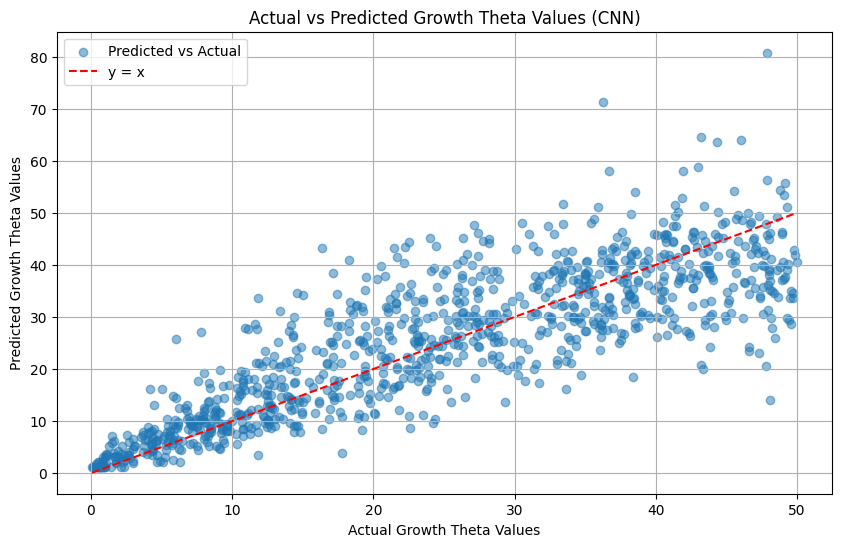

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(growth_test, growth_test_pred_cnn, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(growth_test), max(growth_test)], [min(growth_test), max(growth_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Growth Theta Values (CNN)')
plt.xlabel('Actual Growth Theta Values')
plt.ylabel('Predicted Growth Theta Values')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import StandardScaler

# Function to parse SNP data
def parse_snp_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read().split('//')
    # Count the number of data chunks
    num_chunks = len(data)
    print("Number of data chunks:", num_chunks)
    snp_matrices = []
    for block in data:
        if 'segsites' in block and 'positions' in block:
            lines = block.strip().split('\n')
            # Extract the SNP matrix
            snp_matrix = []
            for line in lines:
                if line.startswith('positions:'):
                    continue
                if line.strip().isdigit():
                    snp_matrix.append([int(x) for x in line.strip()])
            snp_matrices.append(np.array(snp_matrix))
            # snp_matrices.append(np.array(snp_matrix))
            #first_matrix = snp_matrices[0]
            # print("First two lines of the first matrix:")
            # print(first_matrix[:2])
            # print("\nLast two lines of the first matrix:")
            # print(first_matrix[-2:])
            # break
        elif 'segsites: 0' in block and 'positions' not in block:
            snp_matrix = np.zeros((1, 200))
            snp_matrices.append(snp_matrix)
    return snp_matrices

# Load the SNP data
snp_train = parse_snp_file('SNP_train.txt')
# Print the first two and last two lines of the first matrix
first_matrix = snp_train[0]
print("First two lines of the first matrix:")
print(first_matrix[:2])
print("\nLast two lines of the first matrix:")
print(first_matrix[-2:])
# Count the number of SNP matrices
num_snp_matrices = len(snp_train)
print("Number of SNP matrices:", num_snp_matrices)

# Load the theta values
theta_train = np.loadtxt('theta_train.txt')

# Pad the SNP matrices to ensure they all have the same length
max_length = max(len(matrix) for matrix in snp_train)
max_row_length = max(len(row) for matrix in snp_train for row in matrix)
snp_train_padded = [np.pad(matrix, ((0, max_length - len(matrix)), (0, max_row_length - len(matrix[0]))), mode='constant') for matrix in snp_train]
first_matrix_padded = snp_train_padded[0]
print("padded:")
print(first_matrix_padded[:2])
print("\npadded:")
print(first_matrix_padded[-2:])
# Convert the list of padded matrices to a NumPy array
snp_train = np.array(snp_train_padded)

# Normalize the SNP data
scaler = StandardScaler()
snp_train = scaler.fit_transform(snp_train.reshape(-1, snp_train.shape[-1])).reshape(snp_train.shape)

# Build the CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(snp_train.shape[1], snp_train.shape[2])),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(snp_train, theta_train, epochs=50, batch_size=32)

# Evaluate the model on the training data
train_loss, train_mae = model.evaluate(snp_train, theta_train)
print(f"Train MAE: {train_mae}")

# Predict the theta values using the model
theta_train_pred = model.predict(snp_train)

# Print the predicted theta values
print("Predicted Theta Train Values:", theta_train_pred.flatten())

Number of data chunks: 20001
First two lines of the first matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]]

Last two lines of the first matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]
Number of SNP matrices: 20000
padded:
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\xuech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 125.5075 - mae: 8.4682
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 66.3634 - mae: 6.3017
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 55.7328 - mae: 5.8079
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 52.1627 - mae: 5.5942
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 46.5500 - mae: 5.2659
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 42.4369 - mae: 5.0478
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 41.5026 - mae: 4.9402
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 37.0021 - mae: 4.6074
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 31.6695 - mae: 4.3311
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 26.3464 - mae: 3.9633
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 22.6764 - mae: 3.6693
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 23.1331 - mae: 3.6231
Epoch 13/50


In [50]:
# Load the SNP test data
snp_test = parse_snp_file('SNP_test.txt')

# Pad the SNP matrices to ensure they all have the same length
snp_test_padded = [np.pad(matrix, ((0, max_length - len(matrix)), (0, max_row_length - len(matrix[0]))), mode='constant') for matrix in snp_test]

# Convert the list of padded matrices to a NumPy array
snp_test = np.array(snp_test_padded)

# Normalize the SNP test data
snp_test = scaler.transform(snp_test.reshape(-1, snp_test.shape[-1])).reshape(snp_test.shape)

# Predict the theta values using the model
theta_test_pred = model.predict(snp_test)

# Print the predicted theta test values
print("Predicted Theta Test Values:", theta_test_pred.flatten())

Number of data chunks: 1001
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted Theta Test Values: [13.416879   27.16167     4.952922    2.876563   32.016445   18.060284
  2.7193193  48.079502   46.13033    35.46357    19.84243    30.084373
  9.94409    27.727829   25.000387   34.941914   38.0183     19.96764
 25.445953   37.421207   43.725918    5.6825747  43.871502   42.67708
 45.651608    7.842806    5.6702337   5.9004717  30.71812    42.833828
 20.344501   13.6869755  16.692749   39.572247   41.63249    20.637156
 13.436239   36.444622    9.162199   44.59564    40.30856    15.899513
 36.239254   15.645336   14.094972    5.4684978  25.264622   36.05904
 51.63534    23.322145    6.7146206  10.331543   39.497517   16.229952
 25.293707   10.446781   18.528555   38.535908   25.163118   47.082806
 21.691267   23.083435   27.49435    11.785636   39.09261    41.868908
 20.561981   21.62032    32.41044    20.82139    24.992065   27.423565
 11.4672985  33.016724   26.020212   13.1995325   0.093

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
# Read the theta_test.txt file
theta_test = np.loadtxt('theta_test.txt')
# Calculate the Mean Squared Error
mse_snp_test = mean_squared_error(theta_test, theta_test_pred)

# Calculate the Mean Absolute Error
mae_snp_test = np.mean(np.abs(theta_test - theta_test_pred))

# Calculate the R² Score
r2_score_snp_test = r2_score(theta_test, theta_test_pred)

# Calculate the correlation coefficient
correlation_snp_test = np.corrcoef(theta_test.flatten(), theta_test_pred.flatten())[0, 1]

# Print the values
print("Mean Squared Error:", mse_snp_test)
print("Mean Absolute Error:", mae_snp_test)
print("R² Score:", r2_score_snp_test)
print("Correlation Coefficient:", correlation_snp_test)

Mean Squared Error: 74.55081145555772
Mean Absolute Error: 16.382216135101768
R² Score: 0.6374485077186831
Correlation Coefficient: 0.8163978201453614


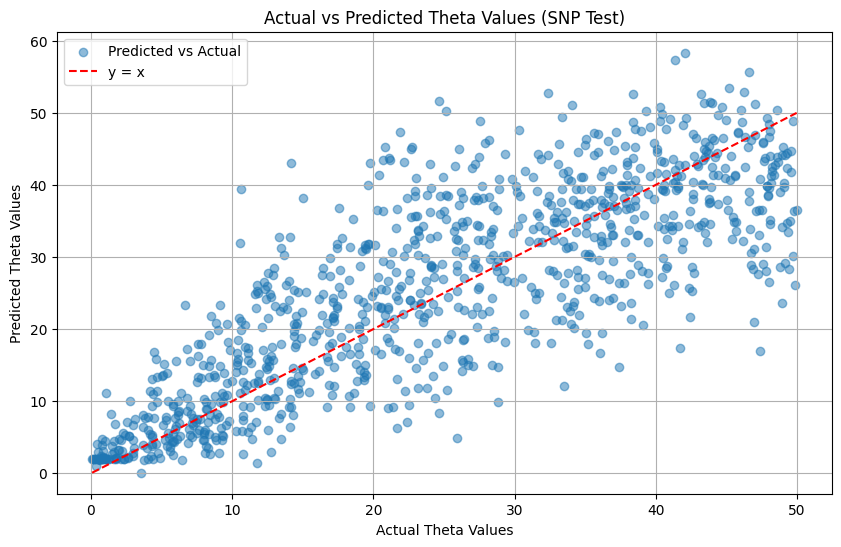

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(theta_test, theta_test_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(theta_test), max(theta_test)], [min(theta_test), max(theta_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Theta Values (SNP Test)')
plt.xlabel('Actual Theta Values')
plt.ylabel('Predicted Theta Values')
plt.legend()
plt.grid(True)
plt.show()